In [205]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [212]:
df = pd.read_csv("data_proc/games_basic_master.csv")
dp = pd.read_csv("data_proc/games_boxscores_master.csv")
dw = pd.read_csv("data_proc/games_wp_master.csv")

mer = pd.merge(df, dp, on="GAME_ID")
merged_df = pd.merge(mer, dw, on="GAME_ID")

merged_df["home_prob"] = 1 - df["away_prob"]
merged_df["SCORE_DIFF"] = merged_df["TEAM1_SCORE_x"] - merged_df["TEAM2_SCORE_x"]
merged_df.dropna(inplace=True)

# X = merged_df[["away_prob", "away_total"]]
# y = merged_df["away_spread"]

display(merged_df)

,GAME_ID,SBR_GAME_ID_x,DATE_x,TEAM1_ID_x,TEAM2_ID_x,TEAM1_SCORE_x,TEAM2_SCORE_x,WINNER_x,away_prob_x,away_spread_x,...,TEAM1_50wp,TEAM1_75wp,TEAM1_100wp,TEAM2_10wp,TEAM2_25wp,TEAM2_50wp,TEAM2_75wp,TEAM2_100wp,home_prob,SCORE_DIFF
0,21600885,20170227_nba_Atlanta_Boston,20170227.0,1610612737,1610612738,114.0,98.0,1,0.392157,4.5,...,0.50,0.560000,0.57,0.5,0.48,0.50,0.560000,0.57,0.607843,16.0
1,21900278,20191129_nba_Chicago_Portland,20191129.0,1610612741,1610612757,103.0,107.0,2,0.277778,7.0,...,0.24,0.280000,0.32,0.2,0.24,0.24,0.280000,0.32,0.722222,-4.0
3,22100624,20220112_nba_Cleveland_Utah,20220112.0,1610612739,1610612762,111.0,91.0,1,0.363636,5.5,...,0.48,0.440000,0.39,0.6,0.68,0.48,0.440000,0.39,0.636364,20.0
4,22000156,20210111_nba_Indiana_Sacramento,20210111.0,1610612754,1610612758,122.0,127.0,2,0.622642,-3.5,...,0.40,0.493333,0.50,0.2,0.36,0.40,0.493333,0.50,0.377358,-5.0
6,21700891,20180224_nba_L.A. Lakers_Sacramento,20180224.0,1610612747,1610612758,113.0,108.0,1,0.555556,-1.5,...,0.50,0.493333,0.49,0.5,0.48,0.50,0.493333,0.49,0.444444,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9644,21701228,20180411_nba_L.A. Lakers_L.A. Clippers,20180411.0,1610612747,1610612746,115.0,100.0,1,0.465116,2.5,...,0.46,0.506667,0.51,0.3,0.56,0.46,0.506667,0.51,0.534884,15.0
9645,21800513,20181227_nba_New York_Milwaukee,20181227.0,1610612752,1610612749,96.0,112.0,2,0.106724,14.0,...,0.50,0.493333,0.48,0.3,0.40,0.50,0.493333,0.48,0.893276,-16.0
9646,21700136,20171105_nba_Atlanta_Cleveland,20171105.0,1610612737,1610612739,117.0,115.0,1,0.140056,11.0,...,0.40,0.440000,0.48,0.2,0.36,0.40,0.440000,0.48,0.859944,2.0
9648,21600644,20170120_nba_Sacramento_Memphis,20170120.0,1610612758,1610612763,91.0,107.0,2,0.256410,8.0,...,0.58,0.613333,0.57,0.5,0.56,0.58,0.613333,0.57,0.743590,-16.0


# Basic LinRegs


##### Score Diff w/ Betting Line

X: ['home_prob', 'away_prob_x', 'TEAM2_10wp']
y: ['SCORE_DIFF']
Coefficients: 
 [[-15.19440752  15.19440752  -2.45276575]]
Mean squared error: 165.30
Coefficient of determination: 0.19



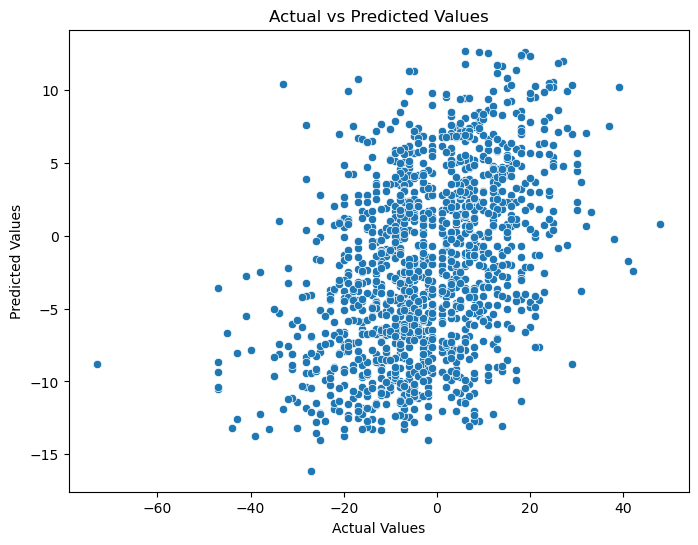

X: ['DATE_x', 'TEAM1_ID', 'TEAM2_ID', 'away_prob_x', 'away_spread_x', 'away_total_x']
y: ['SCORE_DIFF']
Coefficients: 
 [[-1.83268343e-05 -7.77569005e-03 -7.77569005e-03  1.65813593e+01
  -4.29817725e-01 -1.26970941e-03]]
Mean squared error: 160.66
Coefficient of determination: 0.18



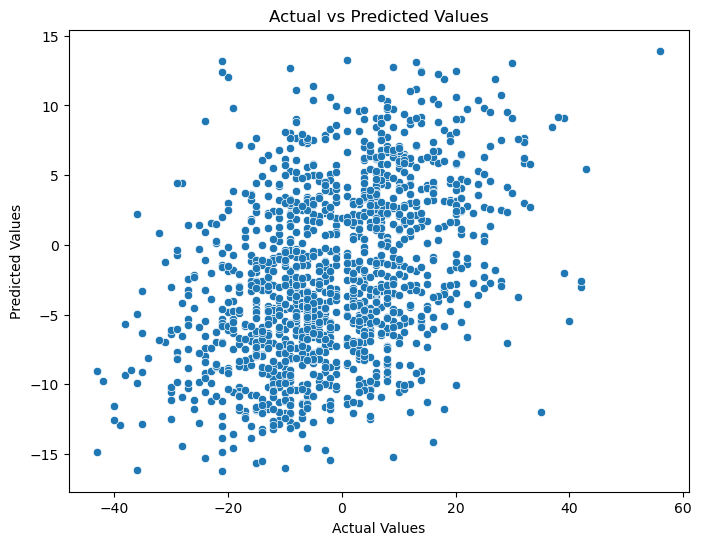

X: ['TEAM1_ID', 'TEAM2_ID', 'away_prob_x', 'away_spread_x', 'away_total_x']
y: ['SCORE_DIFF']
Coefficients: 
 [[ 4.72344163e+13 -4.72344163e+13  1.67691336e+01 -4.20625195e-01
  -7.40111629e-03]]
Mean squared error: 96662354099323.33
Coefficient of determination: -488405003571.85



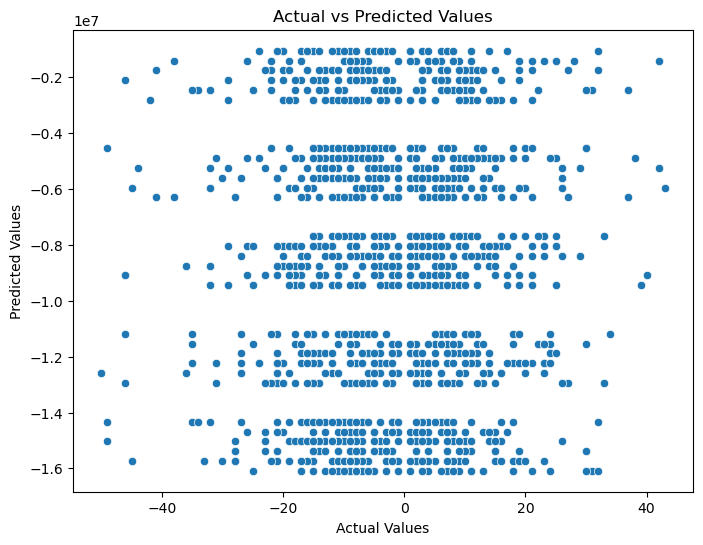

X: ['DATE_x', 'TEAM1_ID', 'TEAM2_ID', 'away_prob_x', 'away_spread_x']
y: ['SCORE_DIFF']
Coefficients: 
 [[-7.57318689e-06 -1.30069919e-02 -1.30069919e-02  1.25276860e+01
  -5.53743351e-01]]
Mean squared error: 182.37
Coefficient of determination: 0.16



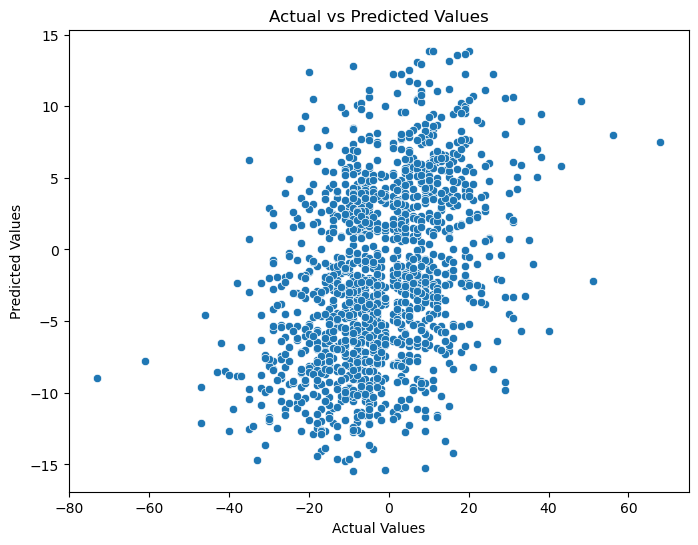

X: ['DATE_x', 'away_prob_x']
y: ['SCORE_DIFF']
Coefficients: 
 [[-8.82376803e-06  3.11279798e+01]]
Mean squared error: 155.95
Coefficient of determination: 0.15



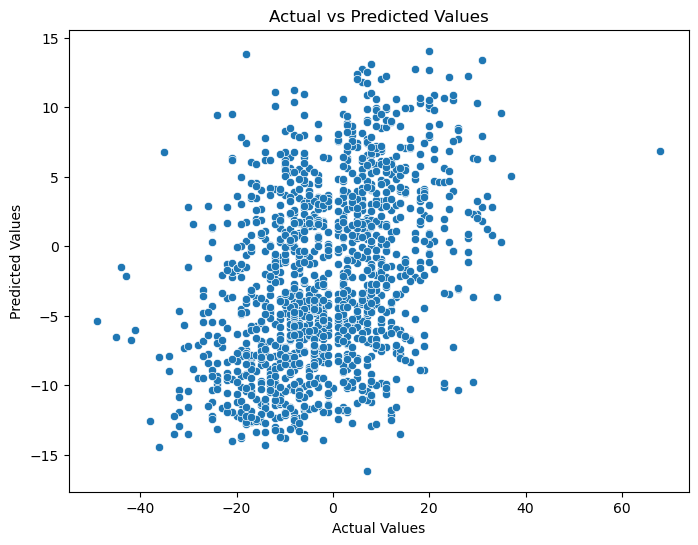

X: ['DATE_x', 'away_spread_x']
y: ['SCORE_DIFF']
Coefficients: 
 [[-1.13935908e-05 -9.21739465e-01]]
Mean squared error: 165.08
Coefficient of determination: 0.20



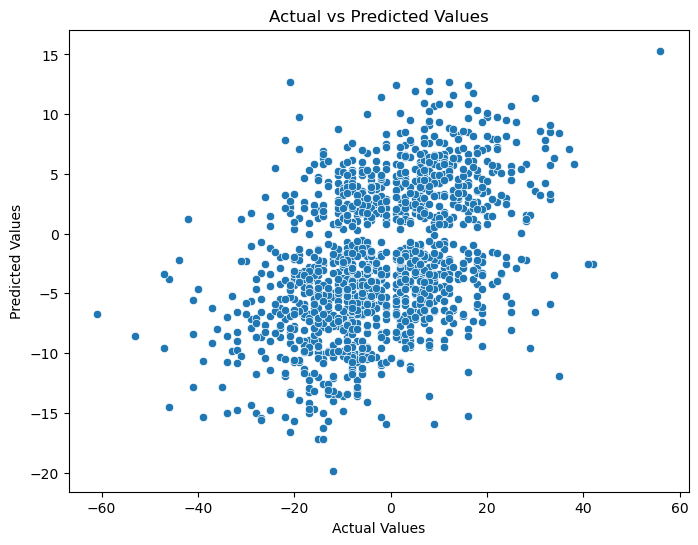

X: ['WINNER']
y: ['SCORE_DIFF']
Coefficients: 
 [[-22.71410356]]
Mean squared error: 75.97
Coefficient of determination: 0.65



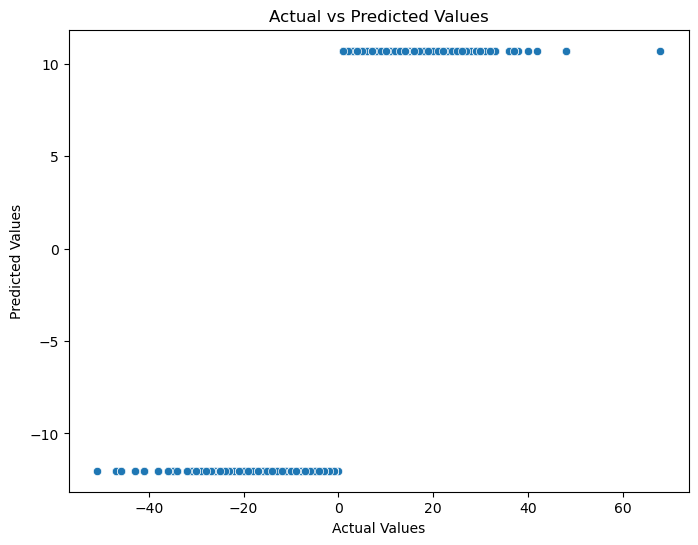

X: ['DATE_x', 'away_prob_x', 'away_spread_x', 'away_total_x']
y: ['WINNER']
Coefficients: 
 [[ 6.42134646e-07 -8.05299015e-01  3.49221820e-03 -1.26814741e-03]]
Mean squared error: 0.22
Coefficient of determination: 0.13



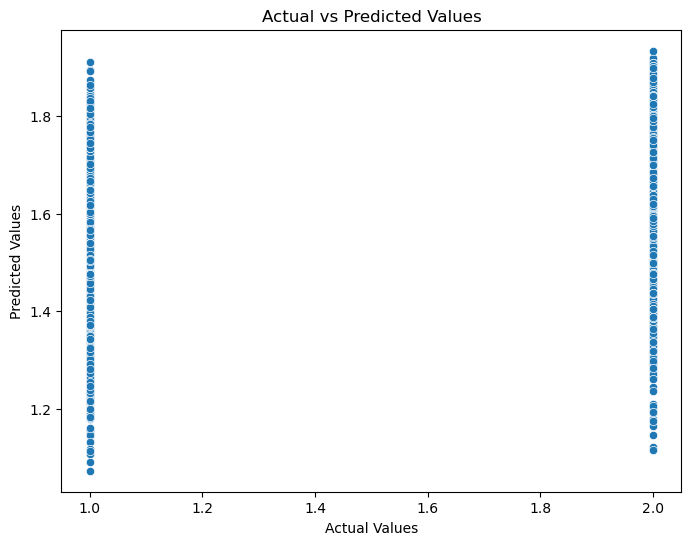

In [222]:
from sklearn.linear_model import LinearRegression

def basicLinearRegression(X_input,y_input):
    X_train, X_test, y_train, y_test = train_test_split(X_input, y_input, test_size=.2)

    print(f"X: {X_input.columns.tolist()}")
    print(f"y: {y_input.columns.tolist()}")
    
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    # The coefficients
    print("Coefficients: \n", reg.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print()

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test.values.ravel(), y=y_pred.ravel())
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.show()

    fig = px.scatter(x=y_test.values.ravel(), y=y_pred.ravel(), labels={'x': 'Actual Values', 'y': 'Predicted Values'}, title='Actual vs Predicted Values')
    fig.show()

basicLinearRegression(merged_df[["home_prob", "away_prob_x", "TEAM2_10wp"]],
                merged_df[["SCORE_DIFF"]])
                
basicLinearRegression(merged_df[["DATE_x", "TEAM1_ID", "TEAM2_ID", "away_prob_x", "away_spread_x", "away_total_x"]],
                merged_df[["SCORE_DIFF"]])

basicLinearRegression(merged_df[["TEAM1_ID", "TEAM2_ID", "away_prob_x", "away_spread_x", "away_total_x"]],
                merged_df[["SCORE_DIFF"]])

basicLinearRegression(merged_df[["DATE_x", "TEAM1_ID", "TEAM2_ID", "away_prob_x", "away_spread_x"]],
                merged_df[["SCORE_DIFF"]])

basicLinearRegression(merged_df[["DATE_x", "away_prob_x"]],
                merged_df[["SCORE_DIFF"]])

basicLinearRegression(merged_df[["DATE_x", "away_spread_x"]],
                merged_df[["SCORE_DIFF"]])

basicLinearRegression(merged_df[["WINNER"]],
                merged_df[["SCORE_DIFF"]])

basicLinearRegression(merged_df[["DATE_x", "away_prob_x", "away_spread_x", "away_total_x"]], merged_df[["WINNER"]])


fig = px.scatter(merged_df, x="away_spread_x", y="SCORE_DIFF", hover_data=["SBR_GAME_ID_x"], trendline="ols")
fig.show()


In [8]:
from sklearn.linear_model import LogisticRegression

def basicLogRegression(X_input,y_input):
    X_train, X_test, y_train, y_test = train_test_split(X_input, np.ravel(y_input), test_size=.2)
    X_train = StandardScaler().fit(X_train).transform(X_train)
    X_test = StandardScaler().fit(X_test).transform(X_test)

    print(f"X: {X_input.columns.tolist()}")
    print(f"y: {y_input.columns.tolist()}")

    reg = LogisticRegression(max_iter=500).fit(X_train, np.ravel(y_train))
    y_pred = reg.predict(X_test)

    # The coefficients
    # print("Coefficients: \n", reg.coef_)
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
    print()

basicLogRegression(df[["DATE", "TEAM1_ID", "TEAM2_ID", "away_prob", "away_spread", "away_total"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["TEAM1_ID", "TEAM2_ID", "away_prob", "away_spread", "away_total"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["TEAM1_ID", "TEAM2_ID", "away_prob", "away_spread"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["away_prob"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["away_spread"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["TEAM1_ID", "TEAM2_ID", "away_spread"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["TEAM1_ID", "TEAM2_ID"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["away_prob", "away_spread"]],
                df[["SCORE_DIFF"]])


basicLogRegression(df[["WINNER"]],
                df[["SCORE_DIFF"]])

basicLogRegression(df[["away_prob", "away_spread", "away_total"]], df[["WINNER"]])


X: ['DATE', 'TEAM1_ID', 'TEAM2_ID', 'away_prob', 'away_spread', 'away_total']
y: ['SCORE_DIFF']
Mean squared error: 179.39
Coefficient of determination: 0.12

X: ['TEAM1_ID', 'TEAM2_ID', 'away_prob', 'away_spread', 'away_total']
y: ['SCORE_DIFF']
Mean squared error: 179.08
Coefficient of determination: 0.14

X: ['TEAM1_ID', 'TEAM2_ID', 'away_prob', 'away_spread']
y: ['SCORE_DIFF']
Mean squared error: 171.33
Coefficient of determination: 0.14

X: ['away_prob']
y: ['SCORE_DIFF']
Mean squared error: 174.42
Coefficient of determination: 0.13

X: ['away_spread']
y: ['SCORE_DIFF']
Mean squared error: 167.64
Coefficient of determination: 0.14

X: ['TEAM1_ID', 'TEAM2_ID', 'away_spread']
y: ['SCORE_DIFF']
Mean squared error: 178.07
Coefficient of determination: 0.13

X: ['TEAM1_ID', 'TEAM2_ID']
y: ['SCORE_DIFF']
Mean squared error: 216.43
Coefficient of determination: -0.07

X: ['away_prob', 'away_spread']
y: ['SCORE_DIFF']
Mean squared error: 176.31
Coefficient of determination: 0.15

X: ['WIN